In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's know about our dataset before proceeding further

Unnamed- it's just a column having serial numbers as an index which we wil remove as this will not conribute in our data prediction.

Date - The date of the observation about Avacado sale.

AveragePrice - the average price of a single avocado.

Total volume- This column defines total volume or we can say quantity of Avacado sold at that particular date.

4046 - Total number of avocados with PLU 4046 sold.

4225 - Total number of avocados with PLU 4225 sold.

4770 - Total number of avocados with PLU 4770 sold.

Total bags- it's number of total bags of small, large and extra large bags of Avacado sold.

Small bags- It's number of small bags containing Avacado sold.

Large bags- It's number of Large bags containing Avacado sold.

Extra large bags- It's number of Extra large bags containing Avacado sold.

Type - It defines type of an Avacado whether it's a  conventional or organic one.

year - The year of sale when sale has been happened. 

Region - This column defies the city or region of the observation where sale has been happened.

In [103]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


With the above we can see first 5 rows of our dataset, by which we can see that in which region avacado has been sold more also the price affecting factors of Avacado.

In [104]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With the above we can see last 5 rows of our dataset, by which we can see that most of the last rows are having null values which we have to deal with and we'll do it further.

In [7]:
df.shape

(16468, 14)

By the above function we can see that we are having 16468 rows and 14 columns  in our dataset.

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [34]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

Here we can see that most of our columns are having float datatype which can work with machine learning model however we need t deal with date column as it is showing object datatype and we need to change it to date data type also we'll treat object datatypes columns.

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
df.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

Great! now we have all the columns ready to work with by which we can proceed further for analysis and model. 

In [5]:
#let's quickly check null values now as we have seen many in tail function.
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

As we can see we have huge number of null values in our data also the number of null values are also same this means we have to compromise and lose huge amount of data as it will not be helpfulfor us for prediction at all so let's remove this null rows.

In [3]:
#By below method we are only removing rows having null value in it's every column.
df = df.dropna(how='all')

In [4]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

And it's done we've succesfully treated all the null values in one go let's proceed further and remove unnamed column as it is not contributing in prediction of our data.

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

<Axes: >

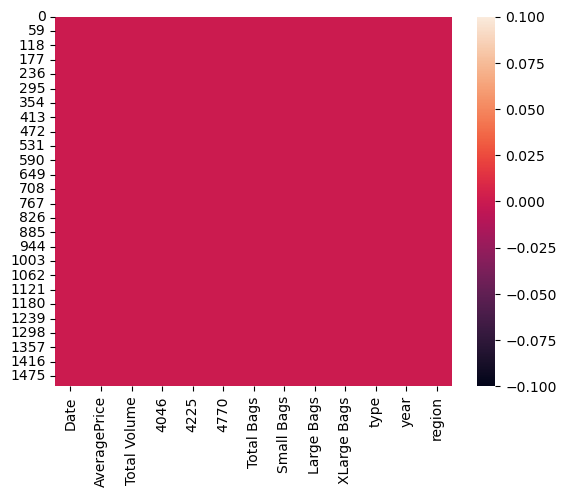

In [41]:
#let's also check heatmap of null values after treatment
sns.heatmap(df.isnull())

In [7]:
#Now let's change our object columns into nuymeric to proceed further.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [8]:
df['type'] = label_encoder.fit_transform(df['type'])

In [9]:
df['region'] = label_encoder.fit_transform(df['region'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   int32  
 11  year          1517 non-null   float64
 12  region        1517 non-null   int32  
dtypes: float64(10), int32(2), object(1)
memory usage: 154.1+ KB


We can see now we have successfully sorted all the the columns it's datatypes and null values present in our data, now let's analys it further.

In [48]:
#Let's check unique values in our data
df.nunique().to_frame("Unique values")

,Unique values
Date,104
AveragePrice,113
Total Volume,1517
4046,1517
4225,1517
4770,1516
Total Bags,1517
Small Bags,1517
Large Bags,1377
XLarge Bags,711


We can see we are having maximum unique values in numeric column which will be helpful in analysing data.

In [49]:
df.duplicated().sum()

0


By the above we can see that we do not have any duplicated column in our dataset and it is a good sign as we do not have to lose more data, which we've alrteady lost to remove null values.

In [50]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


Following is the complete analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

Here are some observation as per above date.

We can see that the count of all columns are same it means our data is perfect and ready to work with.

We can see that there is not too much difference in mean and median of most of the column this means our data is not skewed it is just Xlarge bags column having mean greater than it's median which means it's right skewed and we'll have to treat it which we'll do further.

By analysing the data we can see that there is difference between 75th percentile and maximum value this means we are having outliers in our dataset, ans will treat it further. 

Let's check correlation between different columns.

In [51]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


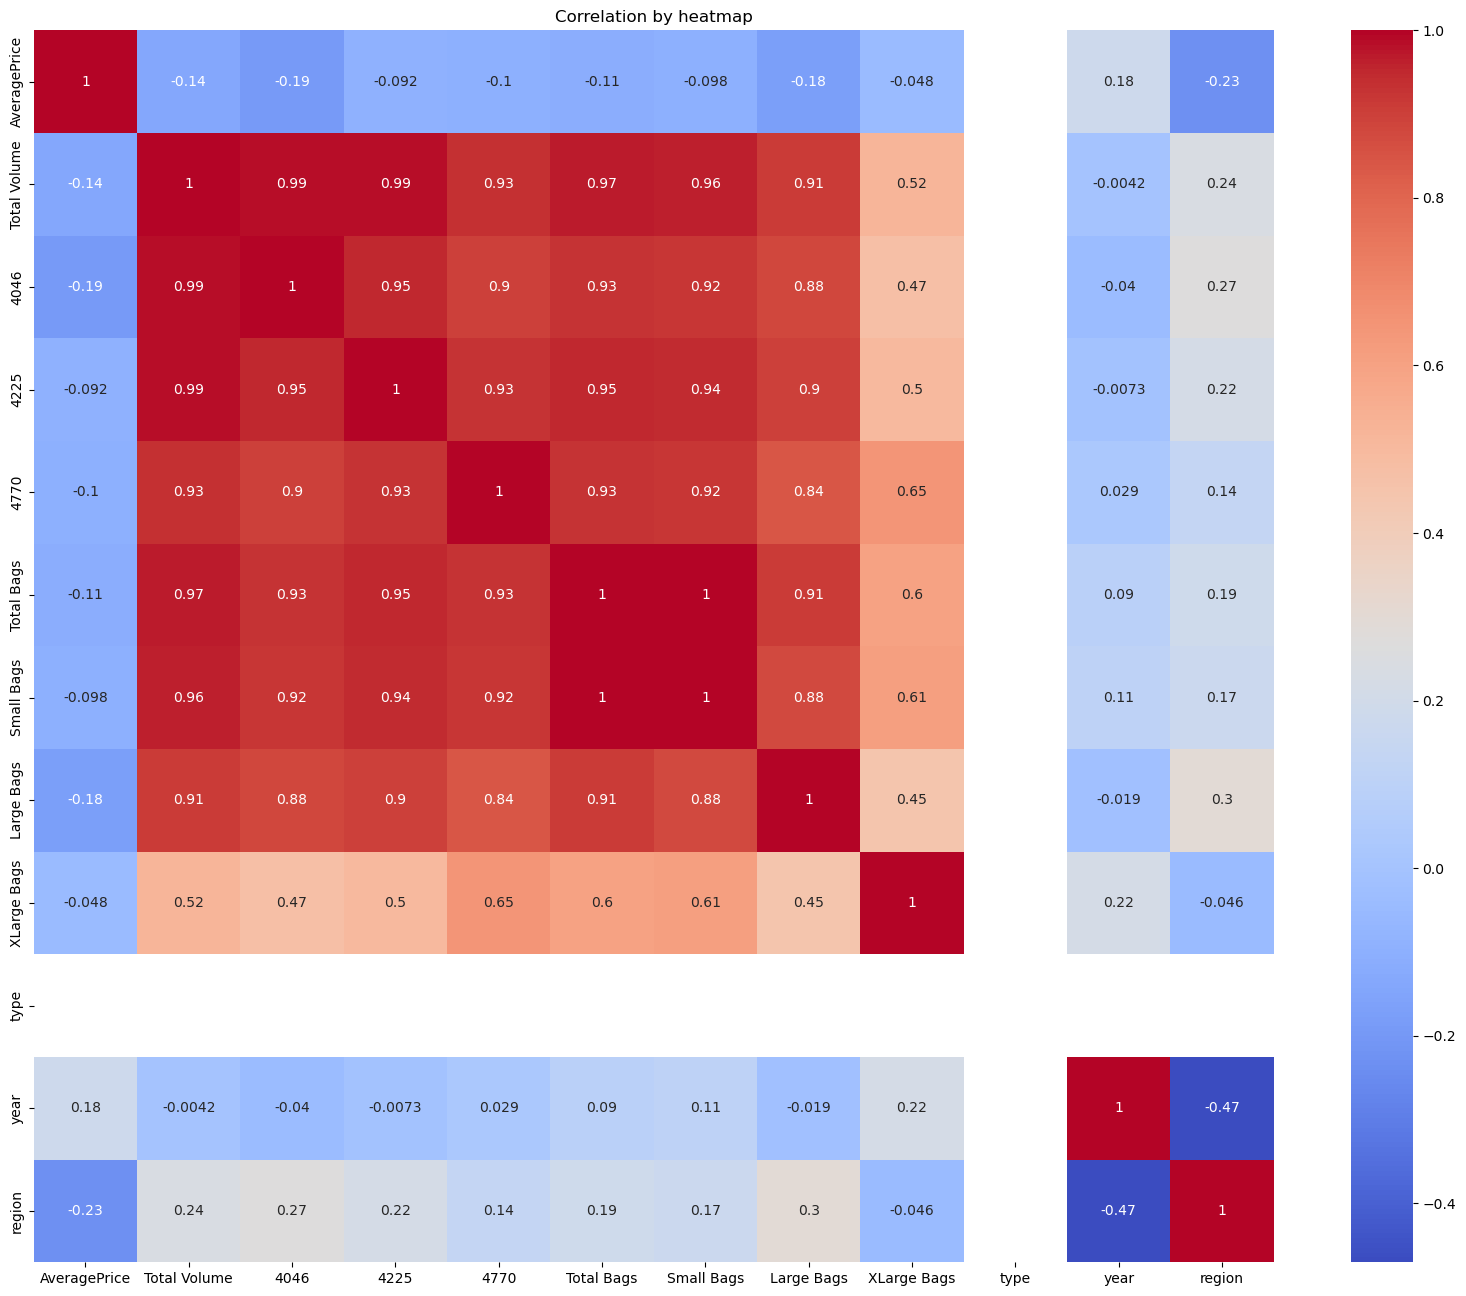

In [53]:
#As it is noteasy to understand correlation via above ode let's check it by making and correlation matrix(heatmap)
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

We can see that we are having highly correlated columns and some of them are logical as if count of any type of bag increase the total number of bags will also increase, in this case we'll leave it as it is.

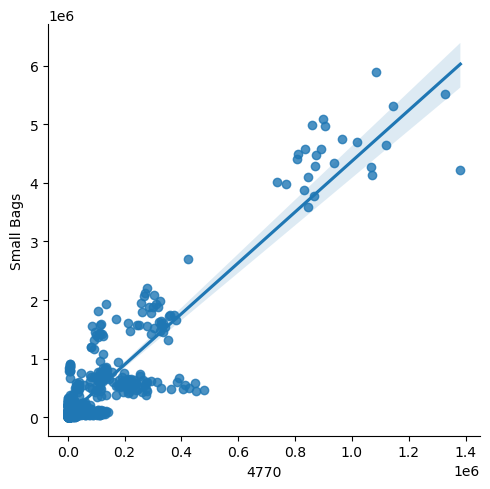

In [58]:
sns.lmplot(x='4770',y='Small Bags',data=df,palette='colorblind')

we can see that small bags is also having postitve correlatin with 4770 column that is a type of Avacado

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'AveragePrice'),
  Text(2, 0, 'Total Volume'),
  Text(3, 0, '4046'),
  Text(4, 0, '4225'),
  Text(5, 0, '4770'),
  Text(6, 0, 'Total Bags'),
  Text(7, 0, 'Small Bags'),
  Text(8, 0, 'Large Bags'),
  Text(9, 0, 'XLarge Bags'),
  Text(10, 0, 'type'),
  Text(11, 0, 'year'),
  Text(12, 0, 'region')])

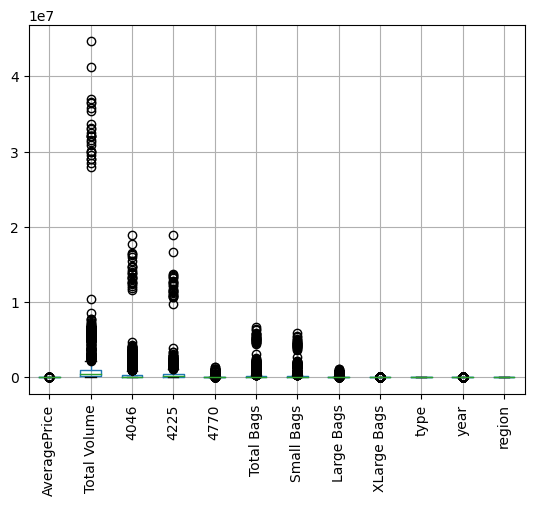

In [112]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks(rotation=90)

With the help of above plot we can see that we may be having outliers in Total vilume columns let's check it further.

In [11]:
#Let's find outlier with Zscore method
outliers=df[['Total Volume']]
z=np.abs(zscore(outliers))
z

,Total Volume
0,0.346966
1,0.349078
2,0.334785
3,0.343636
4,0.349944
...,...
1512,0.318397
1513,0.321242
1514,0.321203
1515,0.318784


In [12]:
np.where(z>3)

(array([1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192,
        1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203,
        1204, 1205, 1206], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0], dtype=int64))

Here we go- we've successfully detected outliers here let's removed them in next step

In [13]:
df1=df[(z<3).all(axis=1)]

And it's done we've successfully removed outliers from the data and it's ready to work with now.

In [14]:
df1.shape

(1492, 13)

we can see earlier we were having more than 1500 rows however after removing outliers we are only having 1492 rows that means we have successfuly removed outliers without too much dataloss.

In [117]:
#now let's check skewnesss in our data
df1.skew()

AveragePrice   -0.124174
Total Volume    2.298999
4046            2.639155
4225            2.072713
4770            3.114816
Total Bags      3.349434
Small Bags      3.540428
Large Bags      4.395406
XLarge Bags     6.750071
type            0.000000
year            1.801500
region          0.311128
dtype: float64

By the above we can see that skewness is present in our dataset which needs to be treated.

In [15]:
#Let's use cuberoot method to remove skewness
df1['Total Volume']=np.cbrt(df1['Total Volume'])
df1['4046']=np.cbrt(df1['4046'])
df1['4225']=np.cbrt(df1['4225'])
df1['4770']=np.cbrt(df1['4770'])
df1['Total Bags']=np.cbrt(df1['Total Bags'])
df1['Small Bags']=np.cbrt(df1['Small Bags'])
df1['Large Bags']=np.cbrt(df1['Large Bags'])
df1['XLarge Bags']=np.cbrt(df1['XLarge Bags'])
df1['year']=np.cbrt(df1['year'])

In [16]:
df1.skew()

AveragePrice   -0.124174
Total Volume    1.242812
4046            1.101929
4225            0.903923
4770            1.060262
Total Bags      1.576833
Small Bags      1.585010
Large Bags      1.041734
XLarge Bags     2.100646
type            0.000000
year            1.801500
region          0.311128
dtype: float64

We can see skewness is still there let's try log method to remove that.

In [17]:
df1['Total Volume'] = np.log1p(df1['Total Volume'])

In [18]:
df1['4046'] = np.log1p(df1['4046'])
df1['4770'] = np.log1p(df1['4770'])
df1['Total Bags'] = np.log1p(df1['Total Bags'])
df1['Small Bags'] = np.log1p(df1['Small Bags'])
df1['Large Bags'] = np.log1p(df1['Large Bags'])
df1['XLarge Bags'] = np.log1p(df1['XLarge Bags'])
df1['year'] = np.log1p(df1['year'])

In [19]:
df1.skew()

AveragePrice   -0.124174
Total Volume    0.460806
4046           -0.235746
4225            0.903923
4770           -0.346823
Total Bags      0.515643
Small Bags      0.543197
Large Bags     -1.091323
XLarge Bags     0.662010
type            0.000000
year            1.801500
region          0.311128
dtype: float64

Here we go- we have successfully removed skewness from all the columns except large bags, let's drop this column to predict data effectively.

In [20]:
df1.drop(columns=['Large Bags'], inplace=True)

In [21]:
df1['Date'] = df1['Date'].astype(str)

In [22]:
df1.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
XLarge Bags     float64
type              int32
year            float64
region            int32
dtype: object

In [23]:
#we need to drop sat column as it is not allowing us to run model even after changing it to object or changing all the columns into integer, so let's drop it as we already having year and we can predict rest things with the help of that column.
df1.drop(columns=['Date'],inplace=True)

# As now our data is ready to work let's divide it into dependent and target variable first we are building an model for region that is a classification model 

In [24]:
features = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'XLarge Bags', 'type', 'year']
target = 'region'

In [25]:
x = df1[features]
y = df1[target]

In [26]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (1492, 10)
dimension of dependent variable: (1492,)


We can see that we are having same number of rows that is 834 and 7 columns in indpendent variable wich means we are going good and can perform training and prediction.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = 42)

In [30]:
#let's import neccesarry libraries

from sklearn.metrics import classification_report, confusion_matrix,roc_curve

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict (x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9375
[[12  0  0 ...  0  0  0]
 [ 0 19  0 ...  1  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  2  0 ... 11  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.86      0.95      0.90        20
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        14
           4       0.92      0.92      0.92        13
           5       0.94      1.00      0.97        16
           6       0.96      1.00      0.98        24
           7       0.93      0.93      0.93        15
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        16
          10       1.00      0.86      0.92         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         5
          14       0.71   

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict (x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.9620535714285714
[[15  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  1  0 ... 12  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      1.00      0.93        20
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        24
           7       0.93      0.93      0.93        15
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        16
          10       1.00      0.86      0.92         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         5
          14  

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict (x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8950892857142857
[[13  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  2  0 ... 11  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0  9]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.69      1.00      0.82        20
           2       0.87      1.00      0.93        13
           3       1.00      1.00      1.00        14
           4       1.00      0.85      0.92        13
           5       0.94      1.00      0.97        16
           6       0.96      0.92      0.94        24
           7       0.93      0.93      0.93        15
           8       1.00      1.00      1.00         8
           9       1.00      0.88      0.93        16
          10       1.00      0.71      0.83         7
          11       0.86      1.00      0.92         6
          12       0.94      0.88      0.91        17
          13       0.80      0.80      0.80         5
          14  

In [34]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict (x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.09598214285714286
[[15  0  0 ...  0  0  0]
 [20  0  0 ...  0  0  0]
 [13  0  0 ...  0  0  0]
 ...
 [14  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [13  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.04      1.00      0.08        15
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        16
           6       0.43      0.96      0.59        24
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00        17
          13       0.00      0.00      0.00         5
          14 

In [35]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict (x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8861607142857143
[[11  0  0 ...  0  0  0]
 [ 0 18  0 ...  1  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  2  0 ... 11  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.86      0.90      0.88        20
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        14
           4       0.85      0.85      0.85        13
           5       1.00      1.00      1.00        16
           6       0.77      0.96      0.85        24
           7       0.85      0.73      0.79        15
           8       1.00      1.00      1.00         8
           9       1.00      0.94      0.97        16
          10       0.86      0.86      0.86         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         5
          14  

Above we have used many models which are providing different accuracy to finalize our model let's check using cross validation and hypothesis testing.

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predrfc)-score.mean()*100))

[0.82943144 0.93645485 0.93288591 0.95973154 0.89597315]
0.9108953783304526
Difference between Accuracy score and cross validation score is : -90.15203783304527


In [38]:
score = cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predetc)-score.mean()*100))

[0.85618729 0.93979933 0.97315436 0.96644295 0.91946309]
0.9310094049516284
Difference between Accuracy score and cross validation score is : -92.13888692373428


In [39]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predabc)-score.mean()*100))

[0.12374582 0.11036789 0.11073826 0.10738255 0.10067114]
0.11058113173666136
Difference between Accuracy score and cross validation score is : -10.962131030808994


In [40]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predbc)-score.mean()*100))

[0.76923077 0.909699   0.88590604 0.88590604 0.82885906]
0.855920181365177
Difference between Accuracy score and cross validation score is : -84.70585742223199


Let's do Hyper parameter tunning via Randomized search

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
parameters={'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

In [43]:
RSV=RandomizedSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [44]:
RSV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]})

In [46]:
RSV.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [48]:
Model=ExtraTreesClassifier(n_estimators= 50,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt',max_depth= 30,bootstrap= False)

In [49]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9620535714285714
[[15  0  0 ...  0  0  0]
 [ 0 19  0 ...  1  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  1  0 ... 12  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.95      0.90        20
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        24
           7       1.00      0.93      0.97        15
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        16
          10       1.00      0.86      0.92         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        17
          13       0.71      1.00      0.83         5
          14  

In [ ]:
We can see that at the final stage ur model is giving accuracy score of 96 which can be considered as excellent accuracy score.

Now let's save our model by pickle method

# Now let's build regressio model for prediction of average price.

In [51]:
features = ['region', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'XLarge Bags', 'type', 'year']
target = 'AveragePrice'

In [52]:
x = df1[features]
y = df1[target]

In [53]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (1492, 10)
dimension of dependent variable: (1492,)


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = 42)

Now we'll check different models so that we can understand which model would be more efficient for us.

In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: 0.7176978414995732
R2 score on training Data: 100.0
Mean Absolute Error: 0.07220982142857144
Mean Squared Error: 0.011409598214285716
Root Mean Squared Error: 0.10681572081995101


In [57]:
    from sklearn.ensemble import RandomForestRegressor
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred_RFR=rfr.predict (x_test)
    pred_train=rfr.predict(x_train)
    print ('R2 score:',r2_score(y_test,pred_RFR))
    print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
    print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
    print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
    print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: 0.8304190383240732
R2 score on training Data: 96.90070392166503
Mean Absolute Error: 0.060784375
Mean Squared Error: 0.006853828705357148
Root Mean Squared Error: 0.0827878536100384


In [58]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: 0.8845478182245665
R2 score on training Data: 100.0
Mean Absolute Error: 0.04959687500000003
Mean Squared Error: 0.00466614571428572
Root Mean Squared Error: 0.06830919201897882


In [59]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: 0.7358531256212992
R2 score on training Data: 82.8141442618064
Mean Absolute Error: 0.07846504555857238
Mean Squared Error: 0.010675829480828498
Root Mean Squared Error: 0.10332390565996089


In [60]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: 0.38689886077316205
R2 score on training Data: 37.842238712671985
Mean Absolute Error: 0.12246671248477305
Mean Squared Error: 0.024779256738444277
Root Mean Squared Error: 0.1574142837815053


As now we've checked all the possible models we'll go forward and use cross validation method to finalize our the model.

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[-1.64619135 -0.19293212 -0.44299459 -0.09687931  0.13399647]
-0.44900018235421496
Difference between R2 score and cross validation score is : 45.61771607692107


In [63]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[-0.95885447  0.04363159  0.43194346  0.36299427  0.27034892]
0.030012752190164173
Difference between R2 score and cross validation score is : -2.170856180692344


In [64]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[-0.00244308  0.36335356  0.48561564  0.39666757  0.34444434]
0.317527608447593
Difference between R2 score and cross validation score is : -30.868213026534733


In [65]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[-0.19537015  0.36737339  0.59454587  0.23203596  0.21452324]
0.24262166031060453
Difference between R2 score and cross validation score is : -23.526312905439152


In [66]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[-0.03810786  0.22561888  0.43253346  0.26672402  0.17425828]
0.2122053549910213
Difference between R2 score and cross validation score is : -20.83363663832897


With the above cross valiadation we can see that random forest regressor is working absolutely perfect and best with our data so let's select this model and perform hyperparameter tunning.

In [67]:
#Lets test our data by Randomized search
from sklearn.model_selection import RandomizedSearchCV

In [68]:
param = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

In [70]:
Rscv=RandomizedSearchCV(RandomForestRegressor(),param,cv=5)
Rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]})

In [71]:
Rscv.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [74]:
Model=RandomForestRegressor(n_estimators= 10,min_samples_split= 5, min_samples_leaf= 2,max_features= 'sqrt',max_depth= None,bootstrap= True)

In [75]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print ('R2 score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.7832413453700403
Mean Absolute Error: 0.06822992689973717
Mean Squared Error: 0.008760574739966864
Root Mean Squared Error: 0.09359794196437689


We can see that at the final stage ur model is giving r2 score of 78 which can be considered as good accuracy score.

Now let's save our model by pickle method

In [76]:
import pickle
filename='Avacado.pkl'
pickle.dump(Model,open(filename,'wb'))

In [77]:
Load_model=pickle.load(open('Avacado.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

78.32413453700403


In [78]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [79]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
Predicted,1.027217,0.985567,1.0059,1.037642,0.946528,1.155092,1.036488,0.716656,1.011583,1.205108,...,1.082536,1.048475,1.116775,1.090442,0.957905,1.390467,1.323933,1.123,1.0622,1.031783
Original,1.030000,1.000000,0.7700,1.090000,0.890000,1.050000,1.110000,0.750000,1.030000,1.220000,...,1.180000,1.040000,1.030000,1.110000,0.860000,1.490000,1.430000,1.140,0.9800,1.100000


# Thank you.